Please write your full name here
- **Name** : Abdelrahman Muhsen Abdellatif


## Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#print(cancer.DESCR) # Print the data set description

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [4]:
def answer_zero():
    # write your answer code here to question 0
    return len(cancer.feature_names)


### Question 1
Pandas dataframes are much easier and more interpretable when dealing with tables. **Convert the cancer data into dataframe.**

Note: Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training any model.

*This function should return a (569, 31) DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
*and index = *

RangeIndex(start=0, stop=569, step=1)

In [5]:
def answer_one():
    
    # Your code here
    dataframeDataSet=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
    dataframeDataSet['target']=cancer.target
    return dataframeDataSet


answer_one()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

In [6]:
def answer_two():
    cancerdf = answer_one()
    Numbenign=cancerdf['target'].sum()
    NumMalignant=len(cancerdf['target'])-Numbenign
    
    return NumMalignant,Numbenign


answer_two()

(212, 357)

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [7]:
def answer_three():
    cancerdf = answer_one()
    y=cancerdf['target']
    X=cancerdf.iloc[:,:-1]
    # Your code here
    
    return X, y

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets

In [8]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    # Your code here
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    
    return X_train, X_test, y_train, y_test

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train`.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    classifier.fit(X_train,y_train)    
    return classifier

### Question 6
Using your knn classifier, predict the class label using the median value for each feature.

In [10]:
def answer_six():
    cancerdf = answer_one()    
    # Your code here
    classifier=answer_five()
    median=cancerdf.median()[:-1]
    print(median.values)
    prediction= answer_five().predict(median.values.reshape(1,-1))

    return prediction
answer_six()

[1.337e+01 1.884e+01 8.624e+01 5.511e+02 9.587e-02 9.263e-02 6.154e-02
 3.350e-02 1.792e-01 6.154e-02 3.242e-01 1.108e+00 2.287e+00 2.453e+01
 6.380e-03 2.045e-02 2.589e-02 1.093e-02 1.873e-02 3.187e-03 1.497e+01
 2.541e+01 9.766e+01 6.865e+02 1.313e-01 2.119e-01 2.267e-01 9.993e-02
 2.822e-01 8.004e-02]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

In [11]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    prediction=knn.predict(X_test)
    # Your code here
    
    return prediction

### Question 8
Find the score (accuracy) of your knn classifier using `X_test` and `y_test` & `X_train` and `y_train`. 
- Is the training accuracy higher or lower that the testing accuracy? 
- According to the test accuracy, would this model generalize well to new inputs?

-they r almost the same 

-yes


In [12]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    trainingaccuracy=knn.score(X_train,y_train)
    testaccuracy=knn.score(X_test,y_test)
    return trainingaccuracy,testaccuracy
answer_eight()

(0.94750656167979, 0.9361702127659575)

### Question 9
##### Accuracy Plot
* Create `mal_train_X`, `mal_train_y`,`ben_train_X`,`ben_train_y`, `mal_test_X`,`mal_test_y`, `ben_test_X` and `ben_test_y` portions of the dataset. Where `mal_train_X` contains all training samples that belongs to malignant class while `mal_train_y` contains all labels of the samples that belongs to malignant class, and so on for other variables.

* Calculate Accuracy scores for each case and save all the results in a list called `scores` using knn model from question 5.

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [13]:
import matplotlib.pyplot as plt
def accuracy_plot():

    %matplotlib inline

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    
    # #################################################################################
    # ###################### Write your code here #####################################
    # #################################################################################
    
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)


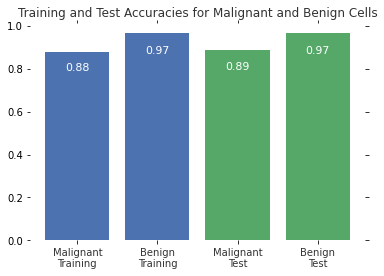

In [14]:
accuracy_plot() 

### Question 10
1. Load Iris dataset from sklearn.
2. Split the data into training and testing (30% testing)
3. Create scatter plot.
4. From the scatter plot choose two features only to train a knn model with suitable "k" of your choice.
5. Evaluate your model performance and comment on your results.

In [15]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
iris=load_iris()
#print(iris.DESCR)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
irisdf=pd.DataFrame(data=iris.data,columns=iris.feature_names)
irisdf['target']=iris.target

In [17]:
y=irisdf['target']
X=irisdf.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


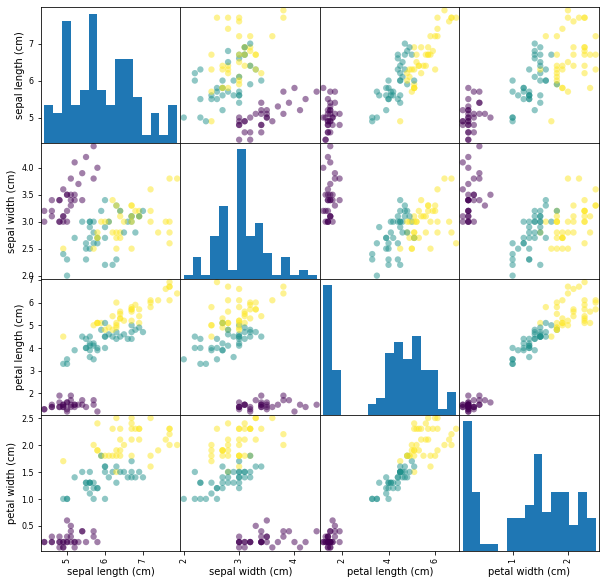

In [18]:
from matplotlib import cm
%matplotlib inline

cmap = cm.get_cmap('viridis')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

In [21]:
X= X[["petal length (cm)", "petal width (cm)"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
classifier= KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)


0.9777777777777777
